## Weather


In [ ]:
#------Importing libraries------->
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/seattle-weather.csv")
df.head(6)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain


In [ ]:
df.shape

(1461, 6)

In [ ]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [ ]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [ ]:
df.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [ ]:
df.weather.value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

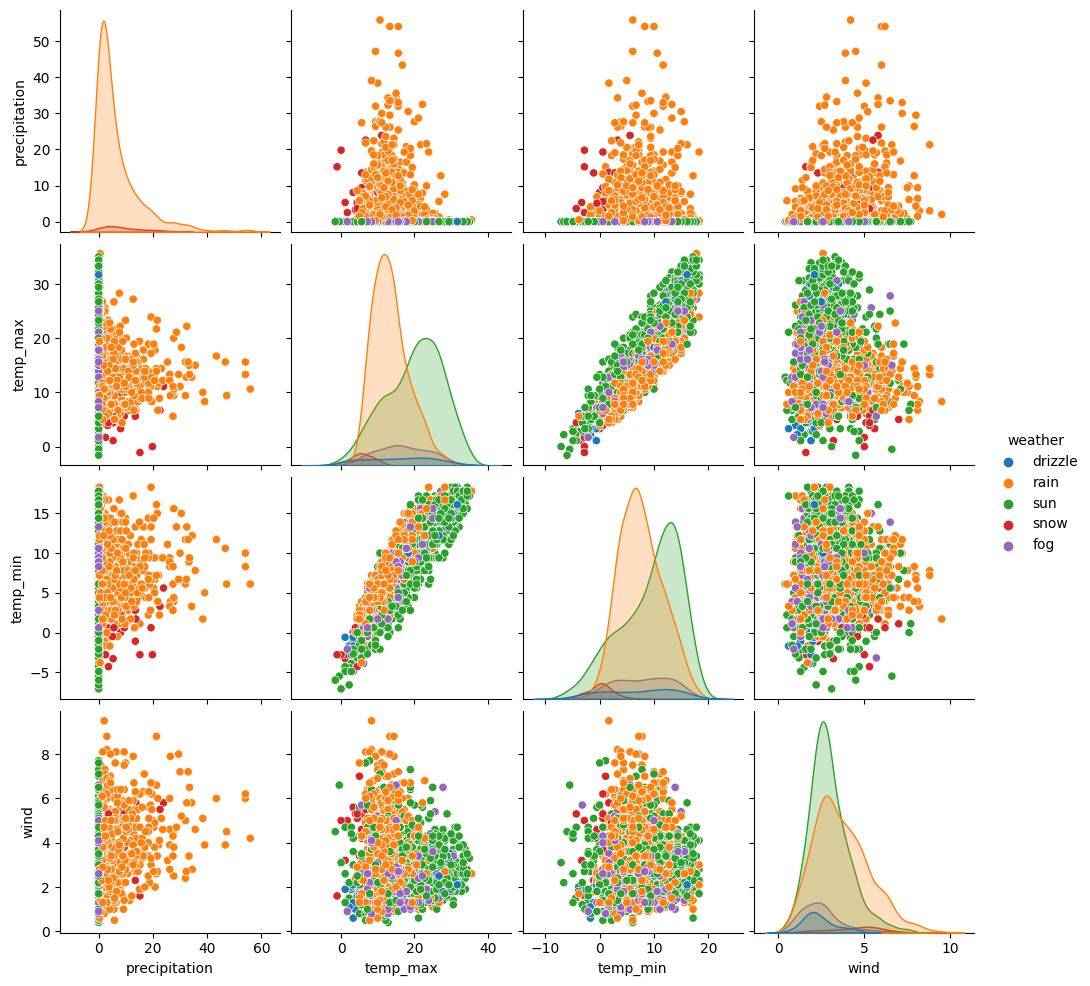

In [ ]:
sns.pairplot(df, vars=['precipitation', 'temp_max', 'temp_min', 'wind'],hue='weather' , kind = 'scatter' , diag_kind='kde')

In [ ]:
fig = px.scatter(df, x="temp_max", y="temp_min", color="weather", marginal_y="violin",marginal_x="box", trendline="ols", template="simple_white")
fig.show()

In [ ]:
fig = px.line(df, x="date", y="precipitation")
fig.show()

In [ ]:
fig = px.line(df, x="date", y="wind")
fig.show()

In [ ]:
fig = px.line(df, x="date", y="temp_max")
fig.show()

In [ ]:
fig = px.line(df, x="date", y="temp_min")
fig.show()

In [ ]:
from datetime import datetime
def date_to_numerical(date_str):
    # Convert the input date string to a datetime object
    date_object = datetime.strptime(date_str, "%Y-%m-%d")
    day = date_object.timetuple().tm_yday
    return day

In [ ]:
df['date']  = df.date.apply(date_to_numerical)

                   date  precipitation  temp_max  temp_min      wind
date           1.000000       0.030050  0.147405  0.212679 -0.050245
precipitation  0.030050       1.000000 -0.228555 -0.072684  0.328045
temp_max       0.147405      -0.228555  1.000000  0.875687 -0.164857
temp_min       0.212679      -0.072684  0.875687  1.000000 -0.074185
wind          -0.050245       0.328045 -0.164857 -0.074185  1.000000


<ipython-input-141-a3bcd972e7ab>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

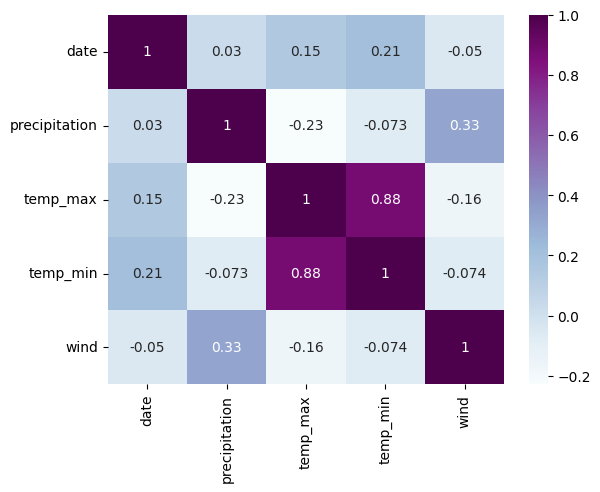

In [ ]:
corr=df.corr()
print(corr)
sns.heatmap(corr, annot=True , cmap="BuPu")

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder ()
df['weather'] = le.fit_transform(df['weather'])

df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,1,0.0,12.8,5.0,4.7,0
1,2,10.9,10.6,2.8,4.5,2
2,3,0.8,11.7,7.2,2.3,2
3,4,20.3,12.2,5.6,4.7,2
4,5,1.3,8.9,2.8,6.1,2


In [ ]:
X=df.drop(columns=['weather'])
Y= df['weather']
X

,date,precipitation,temp_max,temp_min,wind
0,1,0.0,12.8,5.0,4.7
1,2,10.9,10.6,2.8,4.5
2,3,0.8,11.7,7.2,2.3
3,4,20.3,12.2,5.6,4.7
4,5,1.3,8.9,2.8,6.1
...,...,...,...,...,...
1456,361,8.6,4.4,1.7,2.9
1457,362,1.5,5.0,1.7,1.3
1458,363,0.0,7.2,0.6,2.6
1459,364,0.0,5.6,-1.0,3.4


In [ ]:
print("-------------------------Model 1 Random Forest -----------------------")
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(X,Y , test_size=0.70)

forest = RandomForestClassifier()
forest.fit(X, Y)
print("Score : ",forest.score(X, Y)*100 , "%")

expected = Y
predicted = forest.predict(X)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

-------------------------Model 1 Random Forest -----------------------
Score :  100.0 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00       101
           2       1.00      1.00      1.00       641
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00       640

    accuracy                           1.00      1461
   macro avg       1.00      1.00      1.00      1461
weighted avg       1.00      1.00      1.00      1461

[[ 53   0   0   0   0]
 [  0 101   0   0   0]
 [  0   0 641   0   0]
 [  0   0   0  26   0]
 [  0   0   0   0 640]]


In [ ]:
import joblib
joblib.dump(forest, "./random_forest.joblib")

['./random_forest.joblib']